In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from dataset import Dataset
# for Notebook
%matplotlib inline


# Dataset Creation
Import data into a pandas dataframe using the created class Dataset

In [2]:
ds = Dataset()
files = os.listdir(ds.base_path+"/data/")
ds.createDataset(files)

/home/wiz/git/LFN-Project/dataset.py:30: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mob_df = pd.read_csv(mobility_csv, sep=";")
/home/wiz/git/LFN-Project/dataset.py:30: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mob_df = pd.read_csv(mobility_csv, sep=";")
/home/wiz/git/LFN-Project/dataset.py:30: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mob_df = pd.read_csv(mobility_csv, sep=";")


Show created dataframe

In [3]:
ds.df

,Project Reference,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,...,Participant Age,Sending Country Code,Sending City,Sending Organization,Sending Organisation Erasmus Code,Receiving Country Code,Receiving City,Receiving Organization,Receiving Organisation Erasmus Code,Participants
0,2014-1-AT02-KA347-000139,2014-2015,2014-11,2014-11,1.0,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Female,...,13,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,2
1,2014-1-AT02-KA347-000139,2014-2015,2014-11,2014-11,1.0,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Female,...,14,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,3
2,2014-1-AT02-KA347-000139,2014-2015,2014-11,2014-11,1.0,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Female,...,15,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,3
3,2014-1-AT02-KA347-000139,2014-2015,2014-11,2014-11,1.0,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Male,...,14,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,4
4,2014-1-AT02-KA347-000139,2014-2015,2014-11,2014-11,1.0,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Male,...,15,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736429,2019-2-UK01-KA105-062363,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,...,24,UK,London,YOUTH INNOVATION LTD,-,UK,London,YOUTH INNOVATION LTD,-,1
736430,2019-2-UK01-KA105-062363,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,...,32,UK,London,YOUTH INNOVATION LTD,-,UK,London,YOUTH INNOVATION LTD,-,1
736431,2019-2-UK01-KA105-062363,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,...,37,UK,London,YOUTH INNOVATION LTD,-,UK,London,YOUTH INNOVATION LTD,-,1
736432,2019-2-UK01-KA105-062363,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Male,...,41,UK,London,YOUTH INNOVATION LTD,-,UK,London,YOUTH INNOVATION LTD,-,1


Now we apply the cleanup pre-processing onto the dataframe, in which we also filter the columns we need

In [4]:
ds.cleanDataframe()
ds.applyPreprocessing()

The resulting dataframe becomes 

In [5]:
ds.df

,Sending Organization,Receiving Organization,Participants,Sending Country Code,Receiving Country Code
249,UNIVERSITAET INNSBRUCK,UNIVERSITY OF ALBERTA,1,AT,CA
250,UNIVERSITAET INNSBRUCK,UNIVERSITY OF ALBERTA,1,AT,CA
254,UNIVERSITY OF ALBERTA,UNIVERSITAET INNSBRUCK,1,CA,AT
255,UNIVERSITY OF COSTA RICA,UNIVERSITAET INNSBRUCK,1,CR,AT
256,UNIVERSIDAD NACIONAL DE TUCUMAN,UNIVERSITAET INNSBRUCK,1,AR,AT
...,...,...,...,...,...
716937,UNIVERSITY COLLEGE LONDON,FEDERAL STATE AUTONOMOUS EDUCATIONAL INSTITUTI...,1,UK,RU
716938,HEBRON UNIVERSITY,UNIVERSITY OF BRADFORD,1,PS,UK
716939,HEBRON UNIVERSITY,UNIVERSITY OF BRADFORD,1,PS,UK
716940,HEBRON UNIVERSITY,UNIVERSITY OF BRADFORD,3,PS,UK


# Graph creation
We can now go ahead and create our graph, again using the Dataset class 

In [17]:
from graph import CustomGraph as Graph

In [23]:
g = Graph()
# every node will correspond to a university
for index, row in ds.df.iterrows():
    print("adding", row["Sending Organization"])
    g.add_node(row["Sending Organization"])


TypeError: 'tuple' object is not callable

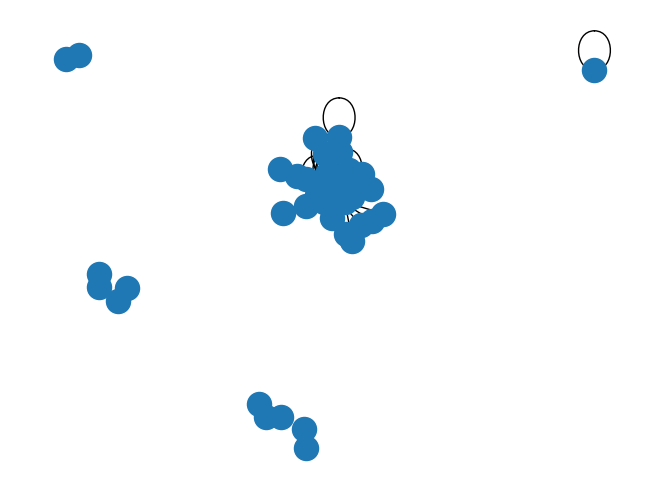

In [19]:
pos = nx.spring_layout(g, seed=225)
nx.draw(g,pos)
plt.show()

In [ ]:
nodes = nx.draw_networkx_nodes(G, pos, node_size=250)
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
labels = nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos)